**Policy Improvement Using Monte Carlo Simulations**

In [ ]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

In [ ]:

START_STATE = (0,0)
TER_STATE = (5,5)
PEN_STATE = (5,2)
HOLES = [(3,2),(4,2)]

In [ ]:
#To check if a state is legal or not
def is_legal(State):
    if (State[0] >= 0) and (State[0] <= 5):
        if (State[1] >= 0) and (State[1] <= 5):
                if State != (3, 2) and State != (4,2):
                    return True
    return False

In [ ]:
#Returns reward for a particular state
def return_reward(S):
    if S == PEN_STATE:
        return(-15)
    elif S == TER_STATE:
        return (15)
    else:
        return(0)

In [ ]:
#returns the change of coordinate after an action
def movement(S,A):
    if A=='U':
        return S[0],S[1]+1
    elif A=='D':
        return S[0],S[1]-1
    elif A=='L':
        return S[0]-1,S[1]
    elif A=='R':
        return S[0]+1,S[1]
    else:
        return S[0],S[1]

In [ ]:
#Defines the next state after performing an action on the current state
def nxtState(S,A):
    if A == "U":
        act = np.random.choice(["U", "L", "R", "S"], p=[0.8, 0.05, 0.05, 0.1])
    elif A == "D":
        act = np.random.choice(["D", "L", "R", "S"], p=[0.8, 0.05, 0.05,  0.1])
    elif A == "L":
        act = np.random.choice(["L", "U", "D", "S"], p=[0.8, 0.05, 0.05, 0.1])
    elif A == "R":
        act =  np.random.choice(["R", "U", "D", "S"], p=[0.8, 0.05, 0.05, 0.1])
        
    state = movement(S,act)
    
    if is_legal(state):
        return state
    return S

In [ ]:
nxtState((5,2),'L')

(5, 2)

In [ ]:
#defines a random policy i.e. each action is equally likely
def random_policy():
    pi = {}
    for i in range(6):
        for j in range(6):
            if (i,j) != (3, 2) and (i,j) != (4,2) and (i,j) != (5, 5):
                pi[(i,j)] = [0.25]*4
    
    return(pi)

In [ ]:
#returns the probabilites of ending up at different states when taking action on a state
def transition(S, A):
    nxtState = [S]
    prob = [0.1] 
    
    if A == 'U':
        if is_legal((S[0],S[1]+1)) == True:
            nxtState.append((S[0],S[1]+1))
            prob.append(0.8)
        else:
            prob[0]+=0.8
            
        if is_legal((S[0]-1,S[1])) == True:
            nxtState.append((S[0]-1,S[1]))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
        if is_legal((S[0]+1,S[1])) == True:
            nxtState.append((S[0]+1,S[1]))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
    elif A == 'D':
        if is_legal((S[0],S[1]-1)) == True:
            nxtState.append((S[0],S[1]-1))
            prob.append(0.8)
        else:
            prob[0]+=0.8
            
        if is_legal((S[0]-1,S[1])) == True:
            nxtState.append((S[0]-1,S[1]))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
        if is_legal((S[0]+1,S[1])) == True:
            nxtState.append((S[0]+1,S[1]))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
    elif A == 'L':
        if is_legal((S[0]-1,S[1])) == True:
            nxtState.append((S[0]-1,S[1]))
            prob.append(0.8)
        else:
            prob[0]+=0.8
            
        if is_legal((S[0],S[1]+1)) == True:
            nxtState.append((S[0],S[1]+1))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
        if is_legal((S[0],S[1]-1)) == True:
            nxtState.append((S[0],S[1]-1))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
    else:
        if is_legal((S[0]+1,S[1])) == True:
            nxtState.append((S[0]+1,S[1]))
            prob.append(0.8)
        else:
            prob[0]+=0.8
            
        if is_legal((S[0],S[1]+1)) == True:
            nxtState.append((S[0],S[1]+1))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
        if is_legal((S[0],S[1]-1)) == True:
            nxtState.append((S[0],S[1]-1))
            prob.append(0.05)
        else:
            prob[0]+=0.05
    
    return nxtState, prob


In [ ]:
#Value Function
V={}
for i in range(6):
    for j in range(6):
            V[(i,j)]=0

In [ ]:
pol = random_policy()

#An iteration to update the value function
def update_iter(S,gamma,V):
    A = ["U", "D", "L", "R"]
    sum=0
    for a in A:
        n,p=transition(S,a) 
        temp=0
        for i in range(len(n)):
            rew =return_reward(n[i])
            temp+= p[i] * (rew + gamma*V[n[i]])
        sum=sum + pol[S][A.index(a)]*temp

    V[S] = sum


In [ ]:
convergence = False
gamma = 0.9

while convergence==False:
    delta=0
    for s in V:
        if s!=(5,5) and s!=(3,2) and s!=(4,2):
            prev_iter=V[s]
            update_iter(s,gamma,V)
            delta = max(abs(V[s]-prev_iter),delta)
    if delta<0.001:
        convergence = True

In [ ]:
print(V)

{(0, 0): -0.4657577124216485, (0, 1): -0.4021054282620332, (0, 2): -0.2728629362567675, (0, 3): -0.14740400667585335, (0, 4): -0.019620938445487582, (0, 5): 0.06970956502603594, (1, 0): -0.7633749889192025, (1, 1): -0.6687343117751998, (1, 2): -0.40578894959840517, (1, 3): -0.2240930581066754, (1, 4): 0.0078076891617396525, (1, 5): 0.19222446529490106, (2, 0): -1.5354861861261972, (2, 1): -1.4355262105234416, (2, 2): -0.6590871124733488, (2, 3): -0.46259298456330594, (2, 4): 0.0857881601439215, (2, 5): 0.5933500454614792, (3, 0): -3.168769203214612, (3, 1): -3.5893957235457075, (3, 2): 0, (3, 3): -1.2822200461702062, (3, 4): 0.24629823178702384, (3, 5): 1.7944583873072422, (4, 0): -5.949374784664753, (4, 1): -7.938467300637708, (4, 2): 0, (4, 3): -4.264569125726084, (4, 4): 0.508276213622906, (4, 5): 5.4294566565089895, (5, 0): -9.68198043600641, (5, 1): -18.198835197002865, (5, 2): -29.29814960736918, (5, 3): -14.126686491078459, (5, 4): 0.8725378066886913, (5, 5): 0}


In [ ]:
#calculating the Q values
def Qvalue(S, A, gamma):
    if state == (5, 5) or state == (4, 2) or state == (3, 2):
        return 0
    else:
        n,p=transition(S,A)
        temp = 0
        for i in range(len(n)):
            rew = return_reward(n[i])
            temp+= p[i] * (rew + gamma*V[n[i]])
        return temp
    

In [ ]:
Qvalue((5,4),'U',0.9)

12.140665033516004

In [ ]:
#intiating a random value function
V={}  

for i in range(6):
    for j in range(6):
        s = (i,j)
        if s != (4, 2) and s != (3, 2):
            V[s]=random.random()
V[(5,5)]=15  
print(V)

{(0, 0): 0.314418141349066, (0, 1): 0.7947914168068343, (0, 2): 0.007384874290978227, (0, 3): 0.43076080613481704, (0, 4): 0.6693338649822151, (0, 5): 0.936649034437876, (1, 0): 0.7620331844422777, (1, 1): 0.5331036700527495, (1, 2): 0.7232279143043613, (1, 3): 0.39042157077322204, (1, 4): 0.6456748721253293, (1, 5): 0.46957279556504294, (2, 0): 0.05222040390868643, (2, 1): 0.6384114772545566, (2, 2): 0.8003645166688954, (2, 3): 0.02679505232845447, (2, 4): 0.6348387485203001, (2, 5): 0.7978223985590401, (3, 0): 0.2530489226514073, (3, 1): 0.27430296827689593, (3, 3): 0.05388230916877523, (3, 4): 0.07682185501613581, (3, 5): 0.013245766096481426, (4, 0): 0.13014168485107902, (4, 1): 0.2601235815527284, (4, 3): 0.03391079035507949, (4, 4): 0.024685620354589433, (4, 5): 0.9580953280858786, (5, 0): 0.33540337336683934, (5, 1): 0.23103350175271786, (5, 2): 0.16829307710414698, (5, 3): 0.0418192327888367, (5, 4): 0.6696210172650776, (5, 5): 15}


In [ ]:
pol=random_policy()

value_iter=[] #Value of (1,1) at each iteration

gamma=0.9

A=["U","D","L","R"]
for i in range(100):

    value_iter.append(V[(0,0)])
    
    convergence=False
    stable=False
    
    while convergence==False: #continue updating the value till it converges
        delta=0
        for s in V:
            if s!=(5,5) and s!=(3,2) and s!=(4,2):
                prev_iter=V[s]
                update_iter(s,gamma,V)
                delta = max(abs(V[s]-prev_iter),delta)
        if delta<0.001:
            convergence = True
    
    while stable==False: #continue till we have a stable policy

        for s in pol:
            
            pi=max(pol[s])
            policy=[i for i, x in enumerate(pol[s]) if x == pi]
            
            q_values=[]
            
            for a in A:
                q_values.append(Qvalue(s,a,gamma))
                
            best_actions=[i for i, x in enumerate(q_values) if x == max(q_values)]
            pol[s]=[0,0,0,0]
            
            n=len(best_actions)
            
            for i in range(n):
                pol[s][best_actions[i]]=1/n
                
            if best_actions==policy:
                stable=True

Text(0, 0.5, 'Value of (1, 1)')

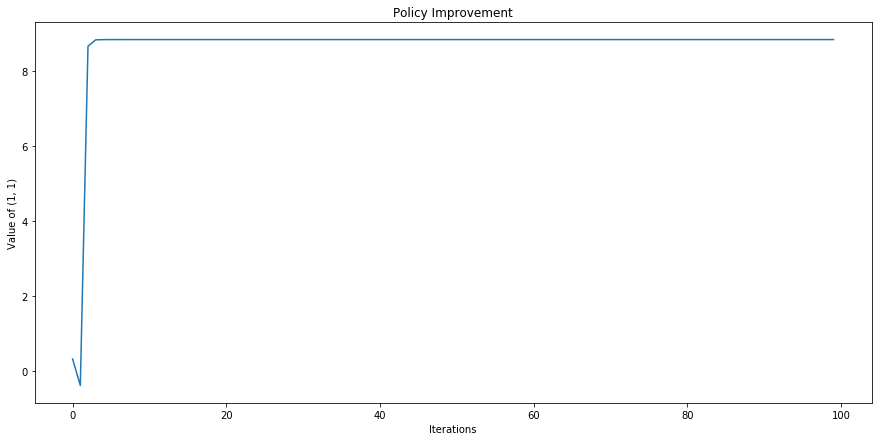

In [ ]:

plt.figure(figsize=(15, 7))
plt.plot(value_iter)
plt.title(label="Policy Improvement") 
plt.xlabel('Iterations')
plt.ylabel('Value of (1, 1)')

In [ ]:
pol #learned policy

{(0, 0): [1.0, 0, 0, 0],
 (0, 1): [1.0, 0, 0, 0],
 (0, 2): [1.0, 0, 0, 0],
 (0, 3): [0, 0, 0, 1.0],
 (0, 4): [0, 0, 0, 1.0],
 (0, 5): [0, 0, 0, 1.0],
 (1, 0): [1.0, 0, 0, 0],
 (1, 1): [1.0, 0, 0, 0],
 (1, 2): [1.0, 0, 0, 0],
 (1, 3): [0, 0, 0, 1.0],
 (1, 4): [0, 0, 0, 1.0],
 (1, 5): [0, 0, 0, 1.0],
 (2, 0): [1.0, 0, 0, 0],
 (2, 1): [1.0, 0, 0, 0],
 (2, 2): [1.0, 0, 0, 0],
 (2, 3): [0, 0, 0, 1.0],
 (2, 4): [0, 0, 0, 1.0],
 (2, 5): [0, 0, 0, 1.0],
 (3, 0): [0, 0, 1.0, 0],
 (3, 1): [0, 0, 1.0, 0],
 (3, 3): [0, 0, 0, 1.0],
 (3, 4): [0, 0, 0, 1.0],
 (3, 5): [0, 0, 0, 1.0],
 (4, 0): [0, 0, 1.0, 0],
 (4, 1): [0, 0, 1.0, 0],
 (4, 3): [1.0, 0, 0, 0],
 (4, 4): [0.5, 0, 0, 0.5],
 (4, 5): [0, 0, 0, 1.0],
 (5, 0): [0, 0, 1.0, 0],
 (5, 1): [0, 0, 1.0, 0],
 (5, 2): [1.0, 0, 0, 0],
 (5, 3): [1.0, 0, 0, 0],
 (5, 4): [1.0, 0, 0, 0]}

In [ ]:
def create_grid(learned_policy):
    a = ['U','D','L','R']
    df = pd.DataFrame({0:[1]*6, 1:[1]*6, 2:[1]*6, 3:[1]*6, 4:[1]*6, 5:[1]*6}, index = [5,4,3,2,1,0])
    
    df.iloc[3,4]= 'H'
    df.iloc[3,3]= 'H'
    df.iloc[0,5]= 'T'
    for i in range(6):
        for j in range(6):
            if (i,j)!=(3,2) and (i,j)!=(4,2) and (i,j)!=(5,5):
                prob = learned_policy[(i,j)]
                ind = [i for i, x in enumerate(prob) if x == max(prob)]
                if len(ind)==1:
                    df.iloc[5-j,i] = a[ind[0]]
                else:
                    str = a[ind[0]]
                    for i in range(1,len(ind)):
                        str+=',' + a[ind[i]]
                    df.iloc[5-j,j] = str
    return(df)
    
    
    

In [ ]:
lp=create_grid(pol)

In [ ]:
lp #Optimal actions at each state 

,0,1,2,3,4,5
5,R,R,R,R,R,T
4,R,R,R,R,"U,R",U
3,R,R,R,R,U,U
2,U,U,U,H,H,U
1,U,U,U,L,L,L
0,U,U,U,L,L,L


In [ ]:
#returns the path our agent takes in each episode
def episode_path(pi):
    path = {'States':[],'Actions':[],'Rewards':[]}
    
    S = (0,0)
    A =  ['U', 'D', 'L', 'R']
    
    while S != (5,5):
        
        path['States'].append(S)
        
        a = np.random.choice(A, p = pi[S])
        path['Actions'].append(a)
        
        next_state = nxtState(S, a)
        rew = return_reward(next_state)
        path['Rewards'].append(rew)
        
        S = next_state
        
    return path

In [ ]:
#Calulating the average upto the ith step
def cumulative_average(ls):
    n=len(ls)
    temp = []
    cum = 0
    for i in range(n):
        cum+=ls[i]
        temp.append(cum/(i+1))
    return temp

In [ ]:
def MC_firstvisit(epi, gamma, pi, state):
    value_ret = {}
    for i in range(6):
        for j in range(6):
            if (i,j) != (3, 2) and (i,j) != (4,2) and (i,j) != (5, 5):
                value_ret[(i,j)] = []

    for i in range(epi):
        
        val = 0
        
        while True:  #Keeping only those episodes with visited states less than 100
            path = episode_path(pi) 
            if(len(path['States']) < 100):  
                break 
            
        states = path['States']
        rewards = path['Rewards']
    
        for i in range(1,len(states)+1):
            val = gamma*val + rewards[-i]
            if states[-i] not in states[0:len(states)-i]:#checking for 1st visit
                value_ret[(states[-i])].append(val)
 
    return(value_ret[state])

In [ ]:
def MC_everyvisit(episodes, gamma, pi,state):
    value = {}
    for i in range(6):
        for j in range(6):
            if (i,j) != (3, 2) and (i,j) != (4,2) and (i,j) != (5, 5):
                value[(i,j)] = []
    
    for i in range(episodes):
        val = 0
        
        ret={}
        for i in value:
            ret[i] = []
    
        while True:  #Keeping episodes with visited states less than 100
            path = episode_path(pi) 
            if(len(path['States']) < 100):  
                break 

        states = path['States']
        rewards = path['Rewards']
    
        for i in range(1, len(states) + 1):
            val = gamma*val + rewards[-i]
            ret[(states[-i])].append(val)

        for i in ret:
            if len(ret[i]) != 0:
                value[i].append(np.mean(ret[i]))

    return(value[state])

In [ ]:
pi = random_policy()

n_epi = 50
n_tr = 100
gamma = 0.9
S = (0,0)

tot_epi = [0]*n_epi
tot_cum = [0]*n_epi

for i in range(n_tr):
    trial = MC_firstvisit(epi, gamma, pi,S)
    tot_cum = [a + b for a, b in zip(tot_cum, cumulative_average(trial))]
    tot_epi = [a + b for a, b in zip(tot_epi, trial)]

avg_epi = [x / n_tr for x in tot_epi]
cum_avg = [x / n_tr for x in tot_cum]



Text(0, 0.5, 'Average value of (1,1) at each episode')

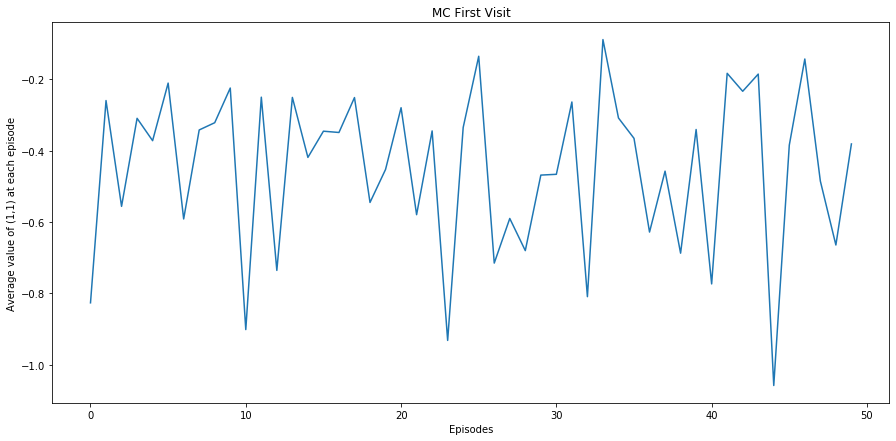

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(avg_epi)
plt.title(label="MC First Visit") 
plt.xlabel('Episodes')
plt.ylabel('Average value of (1,1) at each episode')

Text(0, 0.5, 'Average value of (1, 1) as a function of the number of episodes')

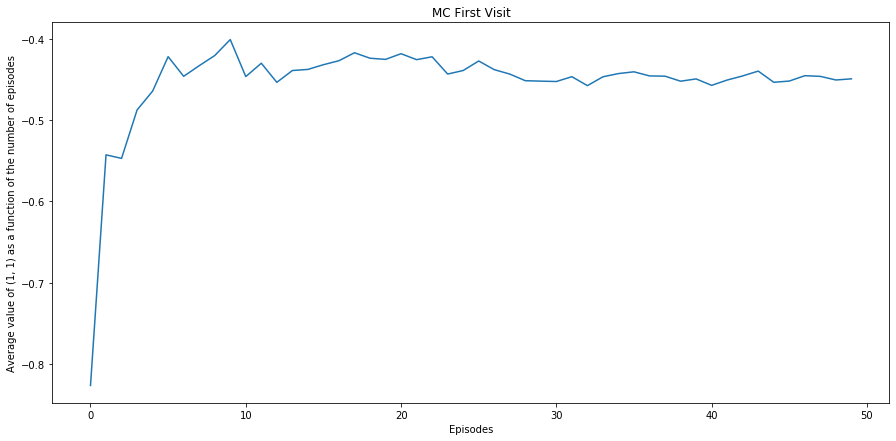

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(cum_avg)
plt.title(label="MC First Visit") 
plt.xlabel('Episodes')
plt.ylabel('Average value of (1, 1) as a function of the number of episodes')


In [ ]:
pi = random_policy()

n_epi = 50
n_tr = 100
gamma = 0.9
S=(0,0)

tot_epi = [0]*n_epi
tot_cum = [0]*n_epi
for i in range(n_tr):
    trial = MC_everyvisit(n_epi, gamma, pi,S)
    tot_cum = [a + b for a, b in zip(tot_cum, cumulative_average(trial))]
    tot_epi = [a + b for a, b in zip(tot_epi, trial)]

avg_epi = [x / n_tr for x in tot_epi]
cum_avg = [x / n_tr for x in tot_cum]

                                



Text(0, 0.5, 'Average value of (1,1) at each episode')

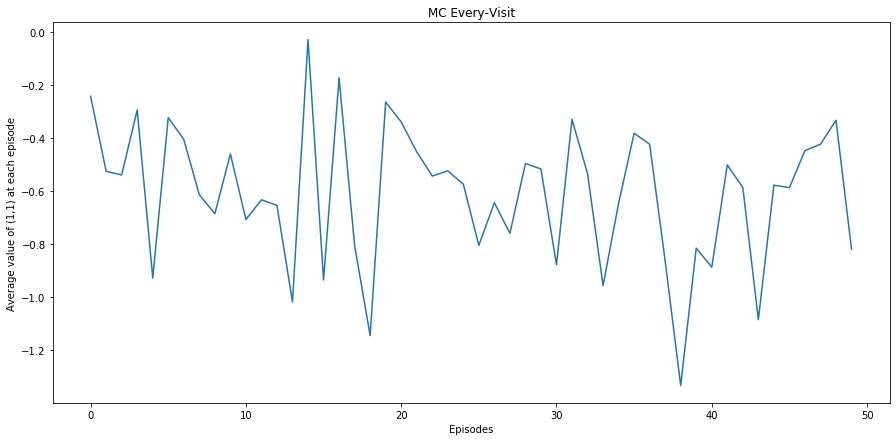

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(avg_epi)
plt.title(label="MC Every-Visit") 
plt.xlabel('Episodes')
plt.ylabel('Average value of (1,1) at each episode')

Text(0, 0.5, 'Average value of (1, 1) as a function of the number of episodes')

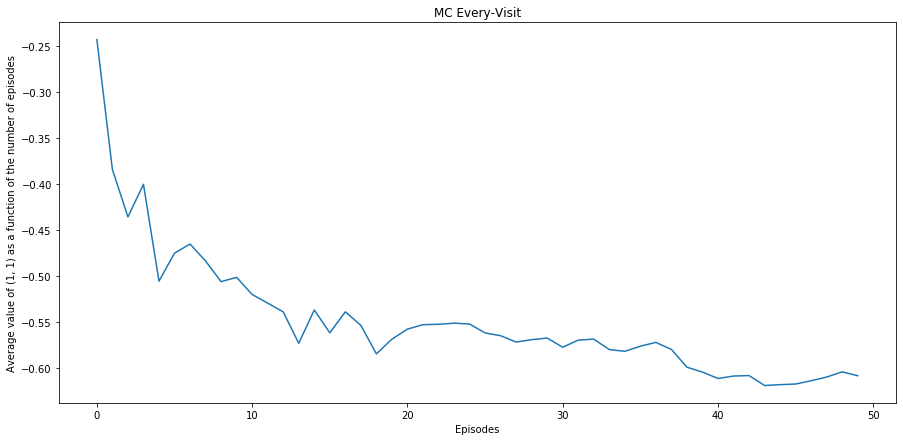

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(cum_avg)
plt.title(label="MC Every-Visit") 
plt.xlabel('Episodes')
plt.ylabel('Average value of (1, 1) as a function of the number of episodes')